In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## **I. Load Data**

In [3]:
import glob

In [4]:
path = "/content/drive/MyDrive/Data Science Journey/Final Thesis/Data"
all_files = glob.glob(path + "/*.xlsx")
all_files

['/content/drive/MyDrive/Data Science Journey/Final Thesis/Data/TRANSIT 2021 (1).xlsx',
 '/content/drive/MyDrive/Data Science Journey/Final Thesis/Data/TRANSIT 2018 (1).xlsx',
 '/content/drive/MyDrive/Data Science Journey/Final Thesis/Data/direct 2019.xlsx',
 '/content/drive/MyDrive/Data Science Journey/Final Thesis/Data/TRANSIT 2019.xlsx',
 '/content/drive/MyDrive/Data Science Journey/Final Thesis/Data/DIRECT 2020.xlsx',
 '/content/drive/MyDrive/Data Science Journey/Final Thesis/Data/TS 2022.xlsx',
 '/content/drive/MyDrive/Data Science Journey/Final Thesis/Data/TRANSIT 2020.xlsx',
 '/content/drive/MyDrive/Data Science Journey/Final Thesis/Data/DIRECT 2022.xlsx',
 '/content/drive/MyDrive/Data Science Journey/Final Thesis/Data/DIRECT 2021.xlsx']

In [5]:
sm = []
for filename in all_files:
  collection = pd.read_excel(filename, header = 1, index_col = None)
  sm.append(collection)

In [6]:
collection = pd.concat(sm)
collection.shape

(139718, 87)

In [ ]:
collection.columns

Index(['Agent', 'Trade', 'Loop', 'Booking Type', 'Booking No.', 'Shipper Ref',
       'Voyage', 'Load ETA', 'Load ETD', 'Allocation Voyage',
       'Place of Receipt', 'Port of Loading', 'Port of Discharge',
       'Place of Delivery', 'Load Mode', 'Disc. Mode', 'DG', 'RF', 'OOG',
       '20DC', '40DC', '40HQ', '45HQ', '20RF', '40RQ', '20FO', '40FO', '20FC',
       '40FC', 'TTL Teus', 'TTL Weight', 'Void', 'Payment Term', 'Case ID',
       'Approve No.', 'Booking Customer ', 'Booking Customer Name',
       'On Behalf of Customer ', 'Pre-Carriage', 'Pre-Carriage Disc. Port',
       '1st Voyage', '1st Disc. Port', '2nd Voyage', '2nd Disc. Port',
       'Booking Status', 'MC Status', 'QC Current Status',
       'QC Current Message', '20DC.1', '40DC.1', '40HQ.1', '45HQ.1', '20RF.1',
       '40RQ.1', '20FO.1', '40FO.1', '20FC.1', '40FC.1', 'TTL Of USD',
       'TTL USD Amount', 'TH PP Currency', 'TH PP Amount', 'TH CC Currency',
       'TH CC Amount', 'DF PP Currency', 'DF PP Amount', 'DF C

In [ ]:
collection.head()

,Agent,Trade,Loop,Booking Type,Booking No.,Shipper Ref,Voyage,Load ETA,Load ETD,Allocation Voyage,...,Pricing PIC,Sign Office,Sales Executive,Pickup Depot,Supplied Teus,Full in Teus,Released Teus,VGM,GC Code,TTL Weight.1
0,VNYML,TPEB,SE8,YBOOK,E491305711,3390047,SE8206S,2022-02-19 05:30:00,2022-02-20 02:30:00,EC4207E,...,SANDY HSU,USCLT,NaN,VNHPHY12,0,1,1,14776.00,LOWE,14776.00
1,VNYML,NCPW,SE8,YBOOK,N492310693,15639612,SE8206S,2022-02-19 05:30:00,2022-02-20 02:30:00,FE2207W,...,SANDY HSU,USCLT,NaN,VNHPHY09,0,1,1,4330.00,CEVA-LOG,4330.00
2,VNYML,MEDW,SE8,YBOOK,M491307707,15617245,SE8206S,2022-02-19 05:30:00,2022-02-20 02:30:00,MD3207W,...,SANDY HSU,USCLT,NaN,VNHPHY12,1,5,6,45193.60,MEIKO-TRANS,45193.60
3,VNYML,TPEB,TSE,YBOOK,W491326750,15628574,TSE203N,2022-02-13 07:30:00,2022-02-14 02:30:00,PS4207E,...,JASON CHENG,TWTPE,NaN,VNHPHY07,0,2,2,23418.00,ITI,23418.00
4,VNYML,MEDW,SE8,YBOOK,M491307705,15617243,SE8204S,2022-02-04 05:30:00,2022-02-05 04:30:00,MD3206W,...,JASON CHENG,TWTPE,NaN,VNHPHY05,0,6,6,58812.32,MEIKO-TRANS,58812.32


In [7]:
df = collection[['Trade', 'Loop', 'Port of Loading', 'Port of Discharge', 'Load ETD', 'Booking Date', 'Load Mode', 'Disc. Mode', 'DG', 'RF', 'OOG',
       '20DC', '40DC', '40HQ', '45HQ', '20RF', '40RQ', '20FO', '40FO', '20FC',
       '40FC', 'TTL Teus', 'TTL Weight', 'Payment Term', '1st Voyage', '1st Disc. Port', '2nd Voyage', '2nd Disc. Port', 'MC Status', 'TTL USD Amount', 'TH PP Currency', 'TH PP Amount', 'TH CC Currency',
       'TH CC Amount', 'DF PP Currency', 'DF PP Amount', 'DF CC Currency',
       'DF CC Amount', 'Revenue', 'MC', 'MC per TEU', 'A/C Type', 'Released Teus', 'TTL Weight.1']]

## **II. Data cleaning**

In [ ]:
df.isna().sum()

Trade                     0
Loop                    195
Port of Loading           0
Port of Discharge         0
Load ETD                  0
Booking Date              0
Load Mode                 0
Disc. Mode                0
DG                   139133
RF                   138941
OOG                  139572
20DC                     23
40DC                     23
40HQ                     23
45HQ                  29544
20RF                  29537
40RQ                  29443
20FO                  29538
40FO                  29537
20FC                  29526
40FC                  29538
TTL Teus                  0
TTL Weight                0
Payment Term              1
1st Voyage                7
1st Disc. Port            7
2nd Voyage            50977
2nd Disc. Port        50918
MC Status              7905
TTL USD Amount         2172
TH PP Currency        64714
TH PP Amount          64714
TH CC Currency        51032
TH CC Amount          51032
DF PP Currency        32542
DF PP Amount        

In [ ]:
set(df['A/C Type'].unique())

{'BCO', 'NVOCC', 'Tariff', nan}

In [ ]:
df.dtypes

Trade                        object
Loop                         object
Port of Loading              object
Port of Discharge            object
Load ETA             datetime64[ns]
Load ETD             datetime64[ns]
Booking Date         datetime64[ns]
Load Mode                    object
Disc. Mode                   object
DG                           object
RF                           object
OOG                          object
20DC                        float64
40DC                        float64
40HQ                        float64
45HQ                        float64
20RF                        float64
40RQ                        float64
20FO                        float64
40FO                        float64
20FC                        float64
40FC                        float64
TTL Teus                      int64
TTL Weight                  float64
Payment Term                 object
1st Voyage                   object
1st Disc. Port               object
2nd Voyage                  

In [8]:
# Drop missing values
df = df.dropna(axis = 0, subset = ['TTL USD Amount', 'Revenue', 'MC Status', '1st Voyage', '1st Disc. Port'])
df = df.dropna(subset=['Payment Term'])

# Missing value imputation
df[['20DC', '40DC', '40HQ', '45HQ', '20RF', '40RQ', '20FO', '40FO', '20FC','40FC']] = df[['20DC', '40DC', '40HQ', '45HQ', '20RF', '40RQ', '20FO', '40FO', '20FC','40FC']].fillna(0)

df[['MC', 'MC per TEU', 'TH PP Amount', 'TH CC Amount', 'DF PP Amount', 'DF CC Amount']] = df[['MC', 'MC per TEU','TH PP Amount', 'TH CC Amount', 'DF PP Amount', 'DF CC Amount']].fillna(0)

df['Loop'] = df['Loop'].fillna(df['Loop'].mode()[0])
df['A/C Type'] = df['A/C Type'].fillna(df['A/C Type'].mode()[0])

df[['TH PP Currency', 'TH CC Currency', 'DF PP Currency', 'DF CC Currency']] = df[['TH PP Currency', 'TH CC Currency', 'DF PP Currency', 'DF CC Currency']].fillna(0)

df[['DG', 'RF', 'OOG', '2nd Voyage', '2nd Disc. Port']] = df[['DG', 'RF', 'OOG', '2nd Voyage', '2nd Disc. Port']].fillna(0)

# Feature transformation
df[['DG', 'RF', 'OOG']] = df[['DG', 'RF', 'OOG']].replace({'Y':1})

In [ ]:
df.isna().sum()

Trade                0
Loop                 0
Port of Loading      0
Port of Discharge    0
Load ETA             0
Load ETD             0
Booking Date         0
Load Mode            0
Disc. Mode           0
DG                   0
RF                   0
OOG                  0
20DC                 0
40DC                 0
40HQ                 0
45HQ                 0
20RF                 0
40RQ                 0
20FO                 0
40FO                 0
20FC                 0
40FC                 0
TTL Teus             0
TTL Weight           0
Payment Term         1
1st Voyage           0
1st Disc. Port       0
2nd Voyage           0
2nd Disc. Port       0
MC Status            0
TTL USD Amount       0
TH PP Currency       0
TH PP Amount         0
TH CC Currency       0
TH CC Amount         0
DF PP Currency       0
DF PP Amount         0
DF CC Currency       0
DF CC Amount         0
Revenue              0
MC                   0
MC per TEU           0
A/C Type             0
Released Te

In [ ]:
df.shape

(128797, 45)

In [9]:
# Feature Engineering
df['Year'] = df['Booking Date'].dt.year
df['Month'] = df['Booking Date'].dt.month

In [10]:
df['Year-Month'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1)).dt.strftime('%Y-%m')
df = df.sort_values(by='Year-Month')
df.head()

,Trade,Loop,Port of Loading,Port of Discharge,Load ETD,Booking Date,Load Mode,Disc. Mode,DG,RF,...,DF CC Amount,Revenue,MC,MC per TEU,A/C Type,Released Teus,TTL Weight.1,Year,Month,Year-Month
19023,IAPS,TSE,VNHPH,PHCEB,2018-01-21 06:00:00,2017-09-27 09:57:04,Y-CY,Y-CY,0,0,...,65.0,4563.21,3033.87,505.65,NVOCC,6,158260.000,2017,9,2017-09
17797,TPEB,TSE,VNHPH,USLAX,2018-01-04 00:30:00,2017-11-28 15:02:47,Y-CY,Y-CY,0,0,...,0.0,5005.84,2853.32,713.33,NVOCC,2,21768.244,2017,11,2017-11
17801,TPEB,TSE,VNHPH,CAVAN,2018-01-04 00:30:00,2017-11-15 16:08:23,Y-CY,Y-CY,0,0,...,0.0,1160.00,618.35,309.18,NVOCC,1,11924.000,2017,11,2017-11
17802,TPEB,TSE,VNHPH,CAVAN,2018-01-04 00:30:00,2017-11-15 16:09:59,Y-CY,Y-CY,0,0,...,0.0,8700.00,1424.91,284.98,NVOCC,3,27589.000,2017,11,2017-11
17803,TPEB,TSE,VNHPH,USTIW,2018-01-04 00:30:00,2017-11-16 15:52:19,Y-CY,Y-CY,0,0,...,0.0,6305.97,1650.97,206.37,NVOCC,4,41047.000,2017,11,2017-11


In [11]:
df = df.reset_index(drop=True).rename(columns={'index':'order'})
df['order'] = df.reset_index().index + 1
df.head()

,Trade,Loop,Port of Loading,Port of Discharge,Load ETD,Booking Date,Load Mode,Disc. Mode,DG,RF,...,Revenue,MC,MC per TEU,A/C Type,Released Teus,TTL Weight.1,Year,Month,Year-Month,order
0,IAPS,TSE,VNHPH,PHCEB,2018-01-21 06:00:00,2017-09-27 09:57:04,Y-CY,Y-CY,0,0,...,4563.21,3033.87,505.65,NVOCC,6,158260.000,2017,9,2017-09,1
1,TPEB,TSE,VNHPH,USLAX,2018-01-04 00:30:00,2017-11-28 15:02:47,Y-CY,Y-CY,0,0,...,5005.84,2853.32,713.33,NVOCC,2,21768.244,2017,11,2017-11,2
2,TPEB,TSE,VNHPH,CAVAN,2018-01-04 00:30:00,2017-11-15 16:08:23,Y-CY,Y-CY,0,0,...,1160.00,618.35,309.18,NVOCC,1,11924.000,2017,11,2017-11,3
3,TPEB,TSE,VNHPH,CAVAN,2018-01-04 00:30:00,2017-11-15 16:09:59,Y-CY,Y-CY,0,0,...,8700.00,1424.91,284.98,NVOCC,3,27589.000,2017,11,2017-11,4
4,TPEB,TSE,VNHPH,USTIW,2018-01-04 00:30:00,2017-11-16 15:52:19,Y-CY,Y-CY,0,0,...,6305.97,1650.97,206.37,NVOCC,4,41047.000,2017,11,2017-11,5


In [ ]:
df.describe()

,DG,RF,OOG,20DC,40DC,40HQ,45HQ,20RF,40RQ,20FO,...,DF PP Amount,DF CC Amount,Revenue,MC,MC per TEU,Released Teus,TTL Weight.1,Year,Month,order
count,128797.000000,128797.000000,128797.000000,128797.000000,128797.000000,128797.000000,128797.0,128797.000000,128797.000000,128797.000000,...,1.287970e+05,128797.000000,128797.000000,128797.000000,128797.000000,128797.000000,1.287970e+05,128797.000000,128797.000000,128797.000000
mean,0.004286,0.005520,0.000939,0.906178,0.116229,1.106439,0.0,0.140508,2.626171,0.044380,...,7.071220e+05,2211.187147,6356.780299,4658.381784,1568.925079,2.145143,4.232429e+04,2020.252063,6.779645,64399.000000
std,0.065326,0.074094,0.030636,2.697787,0.460007,1.871111,0.0,22.619944,136.386587,7.621994,...,3.794718e+05,13380.437593,11915.204725,10103.451828,2268.461678,3.008981,7.331081e+04,1.363474,3.423632,37180.635648
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,100.000000,-134568.790000,-67284.390000,0.000000,1.169200e+01,2017.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,8.100000e+05,0.000000,924.950000,500.510000,238.050000,1.000000,1.256459e+04,2019.000000,4.000000,32200.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,...,9.000000e+05,0.000000,2410.530000,1281.060000,522.600000,1.000000,2.323800e+04,2020.000000,7.000000,64399.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,...,9.500000e+05,195.000000,7353.370000,4860.220000,1758.670000,2.000000,4.177700e+04,2021.000000,10.000000,96598.000000
max,1.000000,1.000000,1.000000,100.000000,24.000000,40.000000,0.0,5000.000000,13500.000000,1600.000000,...,1.800000e+06,851800.000000,532047.250000,530514.650000,99603.250000,144.000000,3.910000e+06,2023.000000,12.000000,128797.000000


In [ ]:
df.columns

Index(['Trade', 'Loop', 'Port of Loading', 'Port of Discharge', 'Load ETA',
       'Load ETD', 'Booking Date', 'Load Mode', 'Disc. Mode', 'DG', 'RF',
       'OOG', '20DC', '40DC', '40HQ', '45HQ', '20RF', '40RQ', '20FO', '40FO',
       '20FC', '40FC', 'TTL Teus', 'TTL Weight', 'Payment Term', '1st Voyage',
       '1st Disc. Port', '2nd Voyage', '2nd Disc. Port', 'MC Status',
       'TTL USD Amount', 'TH PP Currency', 'TH PP Amount', 'TH CC Currency',
       'TH CC Amount', 'DF PP Currency', 'DF PP Amount', 'DF CC Currency',
       'DF CC Amount', 'Revenue', 'MC', 'MC per TEU', 'A/C Type',
       'Released Teus', 'TTL Weight.1', 'Year', 'Month', 'Year-Month',
       'order'],
      dtype='object')

In [ ]:
# df.to_excel('/content/drive/MyDrive/Data Science Journey/Final Thesis/Cleaned_data.xlsx', index=False)

`.info()`, `.describe()`, `.corr()`

### **Correlation**

<ipython-input-194-c179ddf45bce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


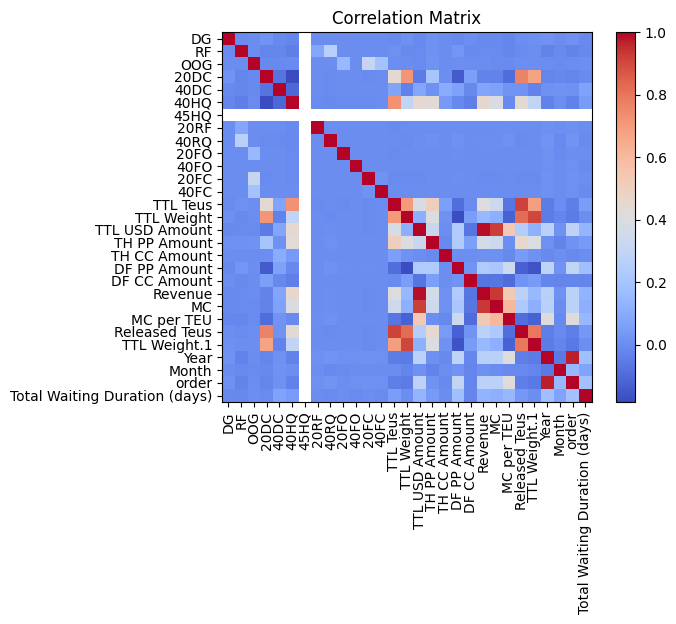

In [ ]:
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

- TTL Weight - Released Teus
- TTL USD Amount - MC

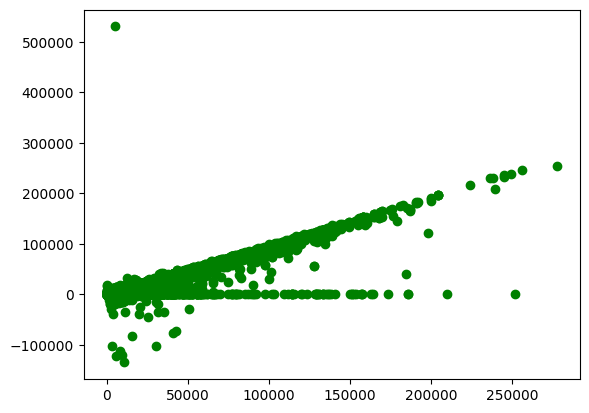

In [ ]:
plt.scatter(df['TTL USD Amount'], df['MC'], color = 'green')
plt.show()

### **Question 1: Which Trade/Loop/Loading port/Disc. Port is the most popular?**

In [12]:
# Which Trade is the most popular
trade = df.groupby('Trade')['order'].count()
trade = trade.sort_values(ascending = False)
trade_df = pd.DataFrame(trade)
trade_df = trade_df.reset_index(drop=False)
trade_df

,Trade,order
0,IAPS,48097
1,TPEB,34193
2,NCPW,19998
3,MEDW,10517
4,SARA,8191
5,IRAW,3156
6,AUSS,2270
7,RASW,1403
8,WSAE,548
9,ESAW,415


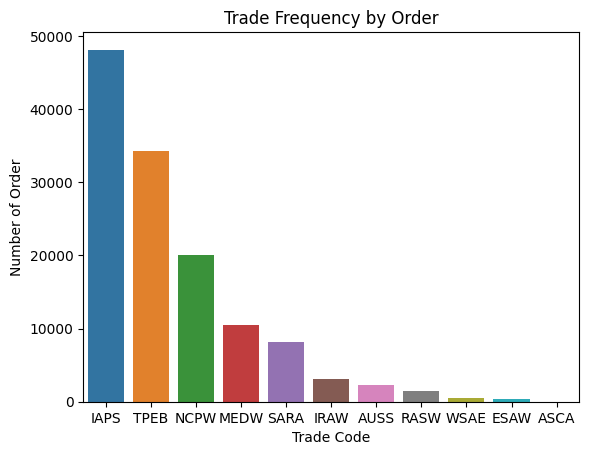

In [ ]:
custom_palette = sns.color_palette(n_colors=5, as_cmap = True)
sns.barplot(x='Trade', y = 'order', data=trade_df, palette = custom_palette)
plt.xlabel('Trade Code')
plt.ylabel('Number of Order')
plt.title('Trade Frequency by Order')
plt.show()

In [ ]:
# Which Trade is the most popular
trade_teu = df.groupby('Trade')['TTL Teus'].sum()
trade_teu = trade_teu.sort_values(ascending = False)
trade_teu_df = pd.DataFrame(trade_teu)
trade_teu_df = trade_teu_df.reset_index(drop=False)
trade_teu_df

,Trade,TTL Teus
0,IAPS,172750
1,TPEB,113817
2,NCPW,72283
3,MEDW,29175
4,SARA,23406
5,IRAW,10048
6,AUSS,6239
7,RASW,6027
8,WSAE,1517
9,ESAW,1124


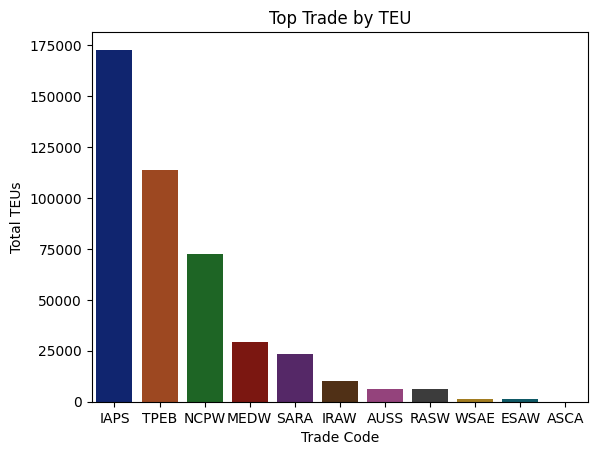

In [ ]:
custom_palette = sns.color_palette(palette = 'dark', n_colors=5, as_cmap = True)
sns.barplot(x='Trade', y = 'TTL Teus', data=trade_teu_df, palette = custom_palette)
plt.xlabel('Trade Code')
plt.ylabel('Total TEUs')
plt.title('Top Trade by TEU')
plt.show()

In [ ]:
# Which Loop is the most popular
loop = df.groupby('Loop')['TTL Teus'].count()
loop = loop.sort_values(ascending = False)
loop_df = pd.DataFrame(loop)
loop_df = loop_df.reset_index(drop=False)
loop_df

,Loop,TTL Teus
0,TSE,59546
1,SE8,47209
2,CVX,8864
3,PN2,8333
4,PS3,2065
5,VCS,1647
6,KVM,1124
7,PN4,7
8,CTI,1
9,ZZZ,1


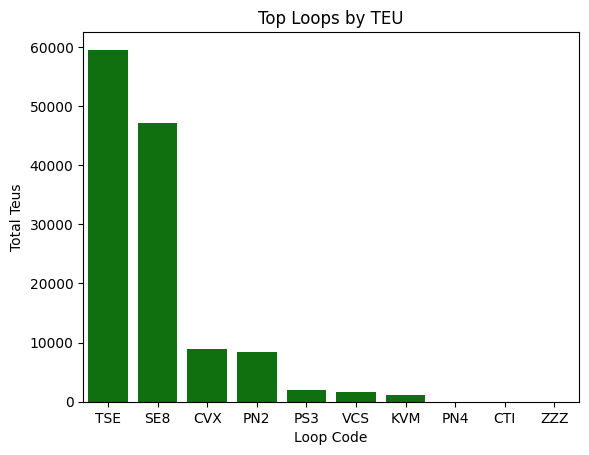

In [ ]:
# custom_palette = sns.color_palette('dark', n_colors=5)
# sns.set_palette(custom_palette)
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_palette)
sns.barplot(x='Loop', y = 'TTL Teus', data=loop_df, color = 'green')
plt.xlabel('Loop Code')
plt.ylabel('Total Teus')
plt.title('Top Loops by TEU')
plt.show()

In [ ]:
# Which Loading Port is the most popular
load_port = df.groupby('Port of Loading')['order'].count()
load_port = load_port.sort_values(ascending = False)
load_port_df = pd.DataFrame(load_port)
load_port_df = load_port_df.reset_index(drop=False)
load_port_df

,Port of Loading,order
0,VNHPH,118983
1,VNLHP,9814


In [ ]:
# Which Discharging Port is the most popular
dis_port = df.groupby('Port of Discharge')['order'].count()
dis_port = dis_port.sort_values(ascending = False)
dis_port_df = pd.DataFrame(dis_port)
dis_port_df = dis_port_df.reset_index(drop=False)
dis_port_df_1 = dis_port_df.head(10)
dis_port_df_1

,Port of Discharge,order
0,USLAX,7947
1,TWKHH,7650
2,NLRTM,7311
3,MYPKG,6913
4,TWTXG,6261
5,SGSIN,6112
6,USTIW,5784
7,PKKHI,5225
8,DEHAM,5221
9,USNYC,5213


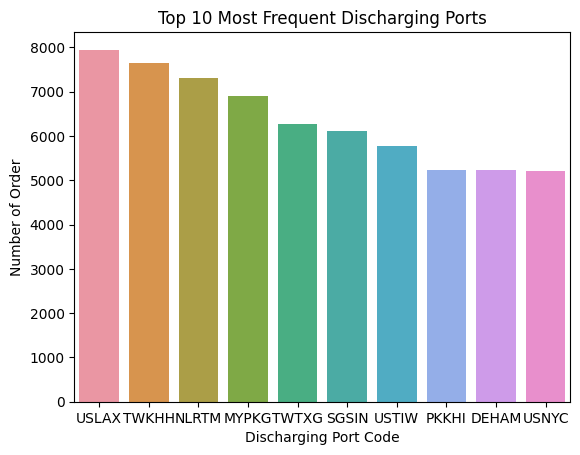

In [ ]:
custom_palette = sns.color_palette(n_colors=7)
sns.set_palette(custom_palette)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_palette)
sns.barplot(x='Port of Discharge', y = 'order', data=dis_port_df_1)
plt.xlabel('Discharging Port Code')
plt.ylabel('Number of Order')
plt.title('Top 10 Most Frequent Discharging Ports')
plt.show()

In [ ]:
# Which Discharging Port is the most popular
dis_teu = df.groupby('Port of Discharge')['TTL Teus'].sum()
dis_teu = dis_teu.sort_values(ascending = False)
dis_teu_df = pd.DataFrame(dis_teu)
dis_teu_df = dis_teu_df.reset_index(drop=False)
dis_teu_df_1 = dis_teu_df.head(10)
dis_teu_df_1

,Port of Discharge,TTL Teus
0,NLRTM,34358
1,TWKHH,28337
2,MYPKG,26270
3,USLAX,25638
4,TWTXG,23182
5,USTIW,22021
6,SGSIN,18654
7,USNYC,15772
8,DEHAM,13261
9,CNTAO,13059


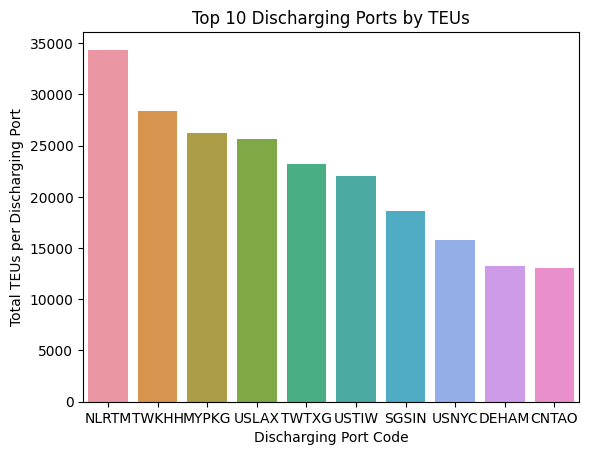

In [ ]:
custom_palette = sns.color_palette(n_colors=5, as_cmap = True)
sns.set_palette(custom_palette)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_palette)
sns.barplot(x='Port of Discharge', y = 'TTL Teus', data=dis_teu_df_1)
plt.xlabel('Discharging Port Code')
plt.ylabel('Total TEUs per Discharging Port')
plt.title('Top 10 Discharging Ports by TEUs')
plt.show()

### **Question 2: Which year had the highest number of orders & TTL TEUs?**

In [17]:
year = df.groupby('Year')['order'].count()
year = year.sort_values(ascending = False)
year_df = pd.DataFrame(year)
year_df = year_df.reset_index(drop=False)
year_df = year_df.sort_values(by='Year')
year_df

,Year,order
5,2017,441
3,2018,19206
4,2019,17904
1,2020,30551
0,2021,31288
2,2022,29405
6,2023,2


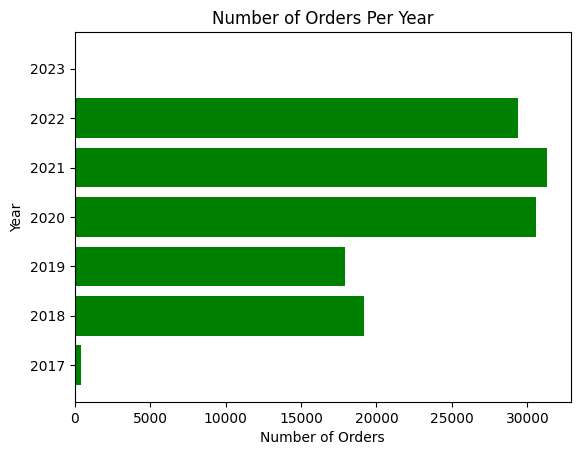

In [ ]:
colors = ['green']
plt.barh(year.index, year.values, color = colors)
plt.ylabel('Year')
plt.xlabel('Number of Orders')
plt.title('Number of Orders Per Year') 
plt.show()

In [18]:
year_teu = df.groupby('Year')['TTL Teus'].sum()
year_teu = year_teu.sort_values(ascending = False)
year_teu_df = pd.DataFrame(year_teu)
year_teu_df = year_teu_df.reset_index(drop=False)
year_teu_df = year_teu_df.sort_values(by='Year')
year_teu_df

,Year,TTL Teus
5,2017,2109
3,2018,72935
4,2019,60360
0,2020,107644
1,2021,97964
2,2022,95390
6,2023,6


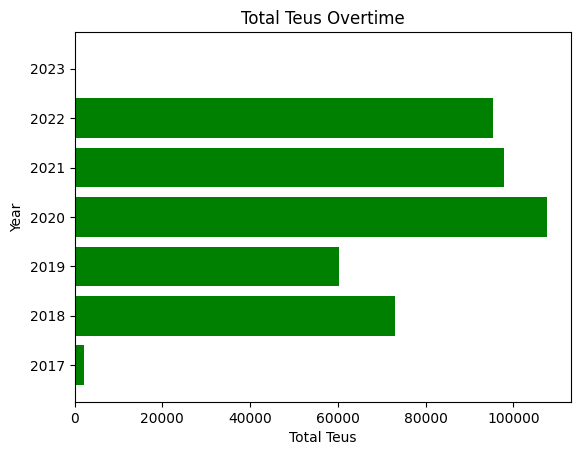

In [ ]:
colors = ['green']
plt.barh(year_teu.index, year_teu.values, color = colors)
plt.ylabel('Year')
plt.xlabel('Total Teus')
plt.title('Total Teus Overtime')
plt.show() 

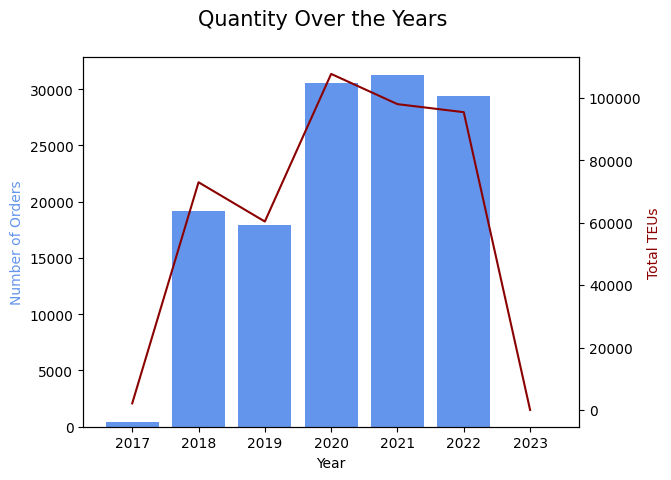

<Figure size 2000x500 with 0 Axes>

In [26]:
fig, ax1 = plt.subplots()
plt.figure(figsize=(20,5))
ax1.bar('Year', 'order', data=year_df, color='#6495ED')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Orders', color='#6495ED')

# Create the line graph
ax2 = ax1.twinx()
ax2.plot('Year', 'TTL Teus', data=year_teu_df, color='#8B0000')
ax2.set_ylabel('Total TEUs', color = '#8B0000')

fig.suptitle('Quantity Over the Years', fontsize=15)

plt.show()

- group by both month-year

In [28]:
mo_ye = df.groupby(['Year-Month'])['order'].count()
mo_ye_df = pd.DataFrame(mo_ye)
mo_ye_df = mo_ye_df.reset_index(drop=False)
mo_ye_df.head()

,Year-Month,order
0,2017-09,1
1,2017-11,7
2,2017-12,433
3,2018-01,1340
4,2018-02,771


In [29]:
mo_ye_df['Year-Month'] = pd.to_datetime(mo_ye_df['Year-Month'])
mo_ye_df['Year'] = mo_ye_df['Year-Month'].dt.year
mo_ye_df['Month'] = mo_ye_df['Year-Month'].dt.month
mo_ye_df['Year_Month'] = pd.to_datetime(mo_ye_df['Year-Month']).dt.strftime('%Y-%m')
# mo_ye_df = mo_ye_df.astype({'Year':'str', 'Month':'str'})
mo_ye_df.head()

,Year-Month,order,Year,Month,Year_Month
0,2017-09-01,1,2017,9,2017-09
1,2017-11-01,7,2017,11,2017-11
2,2017-12-01,433,2017,12,2017-12
3,2018-01-01,1340,2018,1,2018-01
4,2018-02-01,771,2018,2,2018-02


In [30]:
my_teu = df.groupby(['Year-Month'])['TTL Teus'].sum()
my_teu_df = pd.DataFrame(my_teu)
my_teu_df = my_teu_df.reset_index(drop=False)
my_teu_df['Year-Month'] = pd.to_datetime(my_teu_df['Year-Month'])
my_teu_df['Year'] = my_teu_df['Year-Month'].dt.year
my_teu_df['Month'] = my_teu_df['Year-Month'].dt.month
my_teu_df['Year_Month'] = pd.to_datetime(my_teu_df['Year-Month']).dt.strftime('%Y-%m')
my_teu_df.head()

,Year-Month,TTL Teus,Year,Month,Year_Month
0,2017-09-01,6,2017,9,2017-09
1,2017-11-01,29,2017,11,2017-11
2,2017-12-01,2074,2017,12,2017-12
3,2018-01-01,5361,2018,1,2018-01
4,2018-02-01,3389,2018,2,2018-02


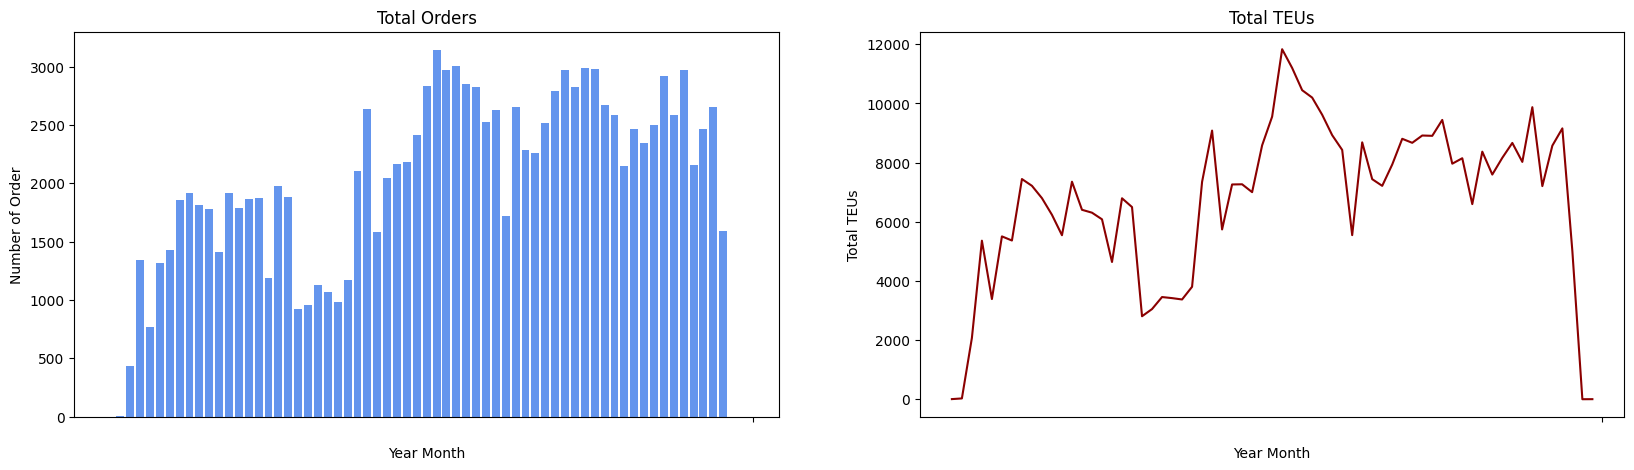

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

ax1.bar('Year_Month', 'order', data=mo_ye_df, color = '#6495ED')
ax1.set_xlabel('Year Month')
ax1.set_ylabel('Number of Order')
ax1.set_title('Total Orders')
ax1.set_xticks(' ')

ax2.plot('Year_Month', 'TTL Teus', data=my_teu_df, color = '#8B0000')
ax2.set_ylabel('Total TEUs')
ax2.set_xlabel('Year Month')
ax2.set_title('Total TEUs')
ax2.set_xticks(' ')

plt.show()

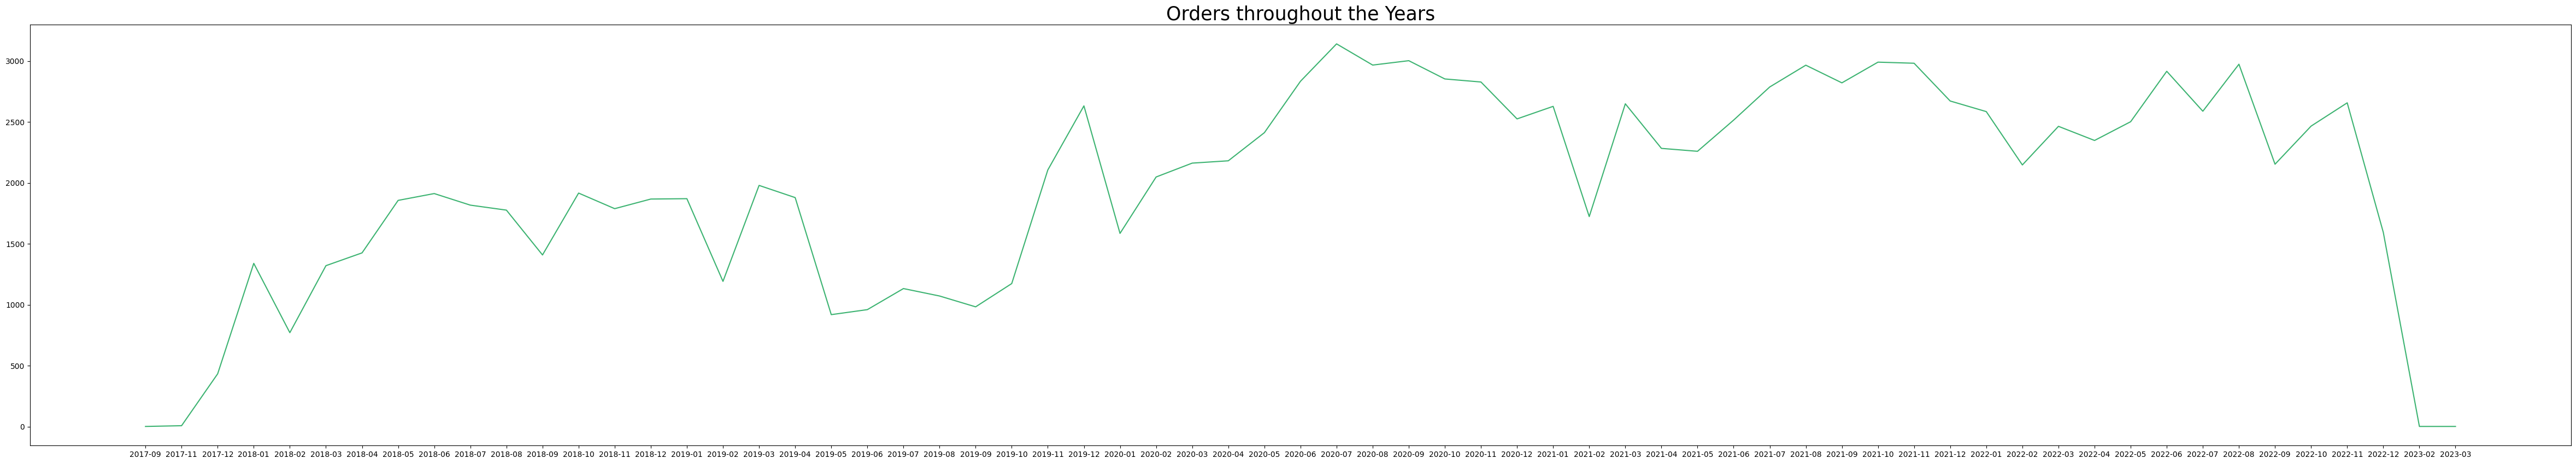

In [ ]:
plt.figure(figsize=(60,10))
plt.plot('Year_Month', 'order', data=mo_ye_df, color = '#3CB371')
plt.title('Orders throughout the Years', fontsize=25)
plt.show()

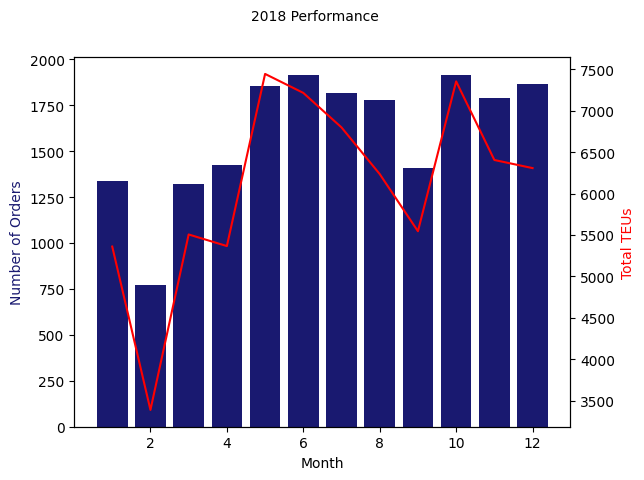

<Figure size 2000x500 with 0 Axes>

In [ ]:
mo_ye_18 = mo_ye_df[mo_ye_df['Year'] == 2018]
mo_ye_18 = mo_ye_18.sort_values(by='Year_Month')
my_teu_18 = my_teu_df[my_teu_df['Year'] == 2018]
my_teu_18 = my_teu_18.sort_values(by='Year_Month')

fig, ax1 = plt.subplots()
plt.figure(figsize=(20,5))
ax1.bar('Month', 'order', data=mo_ye_18, color='#191970')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Orders', color='#191970')

# Create the line graph
ax2 = ax1.twinx()
ax2.plot('Month', 'TTL Teus', data=my_teu_18, color='red')
ax2.set_ylabel('Total TEUs', color = 'red')

fig.suptitle('2018 Performance', fontsize=10)

plt.show()

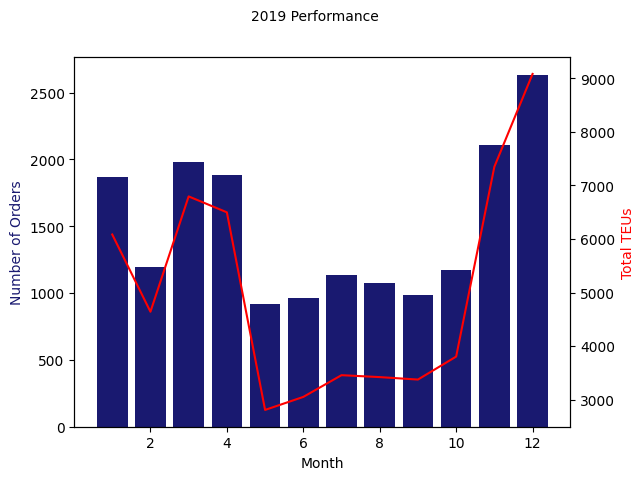

<Figure size 2000x500 with 0 Axes>

In [ ]:
mo_ye_19 = mo_ye_df[mo_ye_df['Year'] == 2019]
mo_ye_19 = mo_ye_19.sort_values(by='Year_Month')
my_teu_19 = my_teu_df[my_teu_df['Year'] == 2019]
my_teu_19 = my_teu_19.sort_values(by='Year_Month')

fig, ax1 = plt.subplots()
plt.figure(figsize=(20,5))
ax1.bar('Month', 'order', data=mo_ye_19, color='#191970')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Orders', color='#191970')

# Create the line graph
ax2 = ax1.twinx()
ax2.plot('Month', 'TTL Teus', data=my_teu_19, color='red')
ax2.set_ylabel('Total TEUs', color = 'red')

fig.suptitle('2019 Performance', fontsize=10)

plt.show()

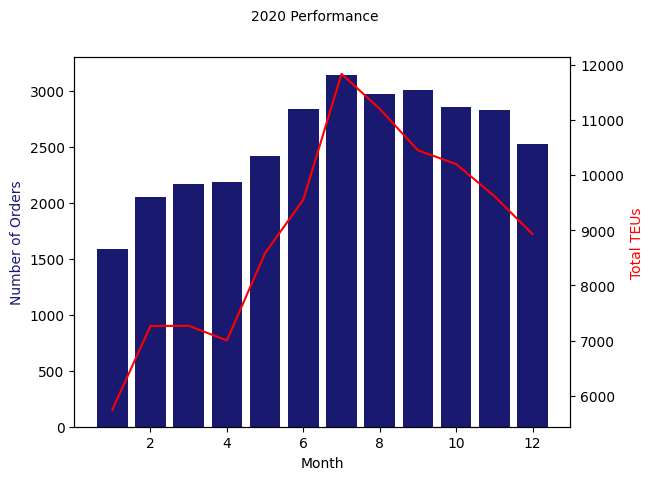

<Figure size 2000x500 with 0 Axes>

In [ ]:
mo_ye_20 = mo_ye_df[mo_ye_df['Year'] == 2020]
mo_ye_20 = mo_ye_20.sort_values(by='Year_Month')
my_teu_20 = my_teu_df[my_teu_df['Year'] == 2020]
my_teu_20 = my_teu_20.sort_values(by='Year_Month')

fig, ax1 = plt.subplots()
plt.figure(figsize=(20,5))
ax1.bar('Month', 'order', data=mo_ye_20, color='#191970')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Orders', color='#191970')

# Create the line graph
ax2 = ax1.twinx()
ax2.plot('Month', 'TTL Teus', data=my_teu_20, color='red')
ax2.set_ylabel('Total TEUs', color = 'red')

fig.suptitle('2020 Performance', fontsize=10)

plt.show()

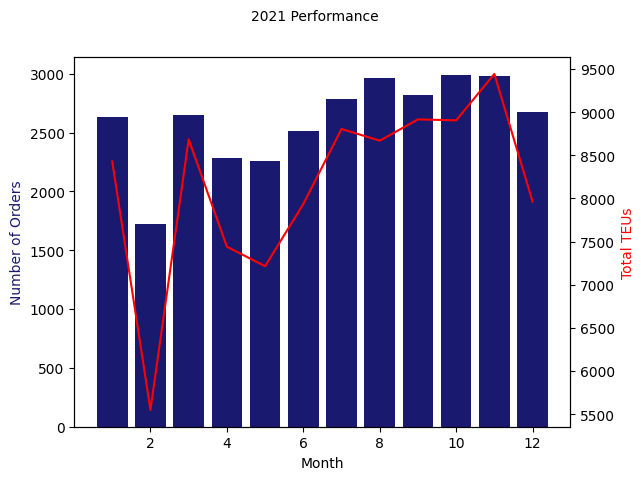

<Figure size 2000x500 with 0 Axes>

In [ ]:
mo_ye_21 = mo_ye_df[mo_ye_df['Year'] == 2021]
mo_ye_21 = mo_ye_21.sort_values(by='Year_Month')
my_teu_21 = my_teu_df[my_teu_df['Year'] == 2021]
my_teu_21 = my_teu_21.sort_values(by='Year_Month')

fig, ax1 = plt.subplots()
plt.figure(figsize=(20,5))
ax1.bar('Month', 'order', data=mo_ye_21, color='#191970')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Orders', color='#191970')

# Create the line graph
ax2 = ax1.twinx()
ax2.plot('Month', 'TTL Teus', data=my_teu_21, color='red')
ax2.set_ylabel('Total TEUs', color = 'red')

fig.suptitle('2021 Performance', fontsize=10)

plt.show()

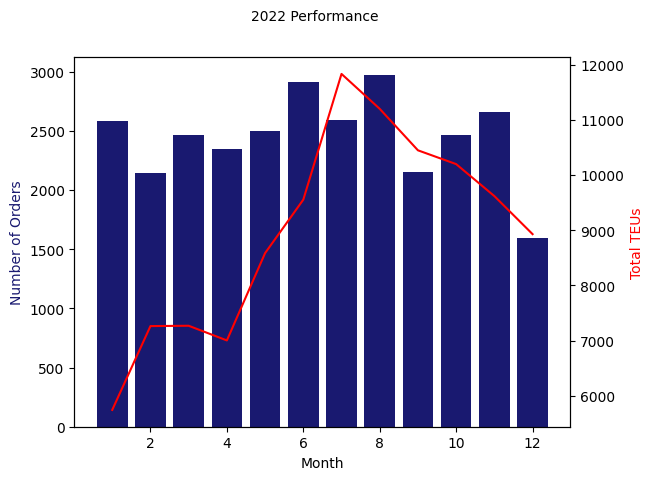

<Figure size 2000x500 with 0 Axes>

In [ ]:
mo_ye_22 = mo_ye_df[mo_ye_df['Year'] == 2022]
mo_ye_22 = mo_ye_22.sort_values(by='Year_Month')
my_teu_22 = my_teu_df[my_teu_df['Year'] == 2022]
my_teu_22 = my_teu_20.sort_values(by='Year_Month')

fig, ax1 = plt.subplots()
plt.figure(figsize=(20,5))
ax1.bar('Month', 'order', data=mo_ye_22, color='#191970')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Orders', color='#191970')

# Create the line graph
ax2 = ax1.twinx()
ax2.plot('Month', 'TTL Teus', data=my_teu_22, color='red')
ax2.set_ylabel('Total TEUs', color = 'red')

fig.suptitle('2022 Performance', fontsize=10)

plt.show()

### **Question 3: Which year had the highest revenue/MC/ MC per Teu/TTL Weight?**
- distibution of revenue/teu quantity?
- distribution of TTL USD Amount (Freight Rate) monthly from 2020 to 2022

In [32]:
rev = df.groupby(['Year-Month'])['Revenue'].sum()
rev_df = pd.DataFrame(rev)
rev_df = rev_df.reset_index(drop=False)
rev_df.head()

,Year-Month,Revenue
0,2017-09,4563.21
1,2017-11,34811.47
2,2017-12,1544559.59
3,2018-01,5172901.67
4,2018-02,2347175.49


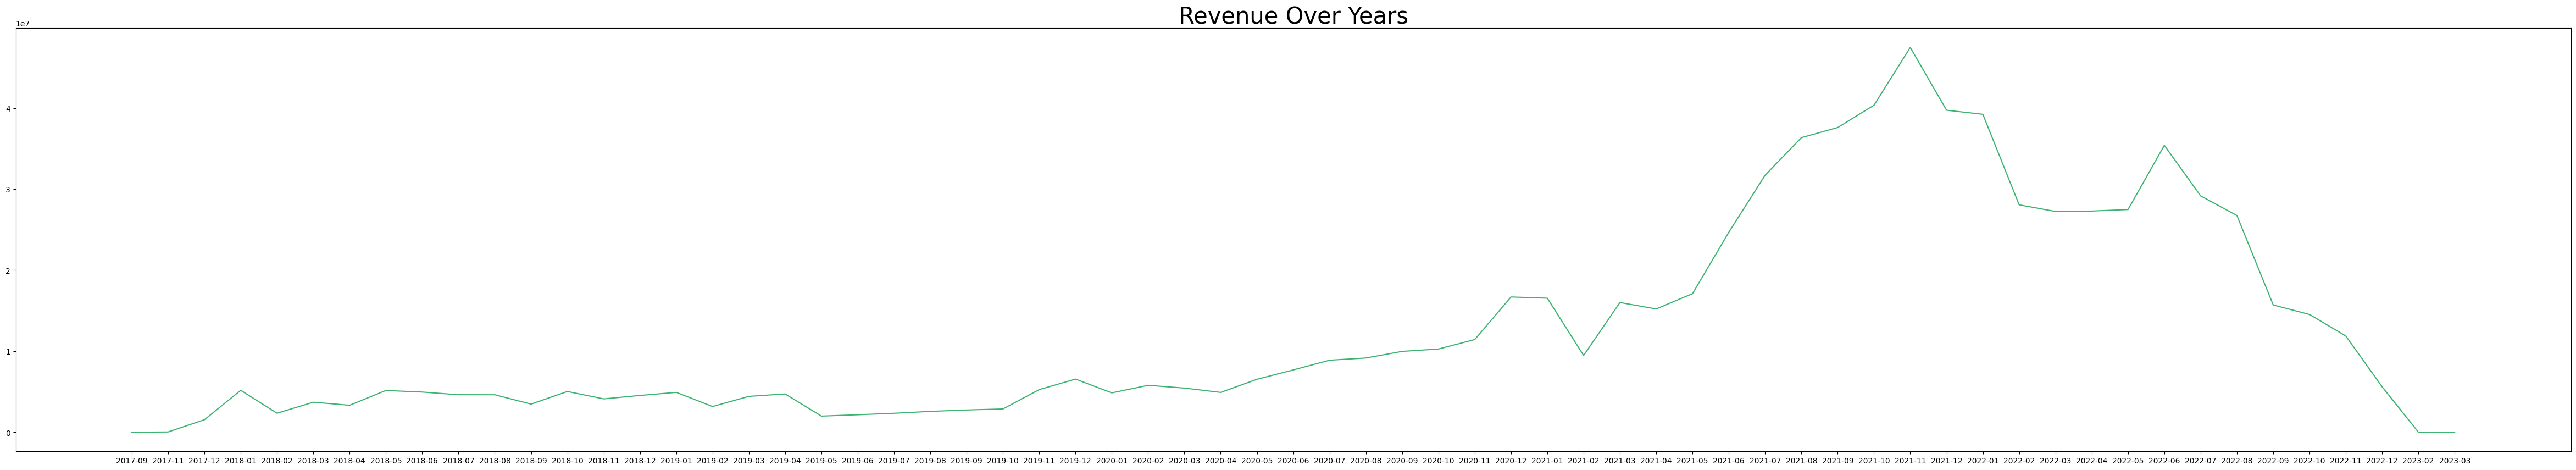

In [ ]:
colors = ['mediumseagreen']
plt.figure(figsize=(60,10))
plt.plot('Year-Month', 'Revenue', data=rev_df, color = '#3CB371')
plt.title('Revenue Over Years', fontsize=30)
plt.show()

In [33]:
freight_rate = df.groupby(['Year-Month'])['TTL USD Amount'].sum()
freight_rate_df = pd.DataFrame(freight_rate)
freight_rate_df = freight_rate_df.reset_index(drop=False)
freight_rate_df.head()

,Year-Month,TTL USD Amount
0,2017-09,3043.43
1,2017-11,34055.37
2,2017-12,1203985.86
3,2018-01,4184984.59
4,2018-02,1720540.04


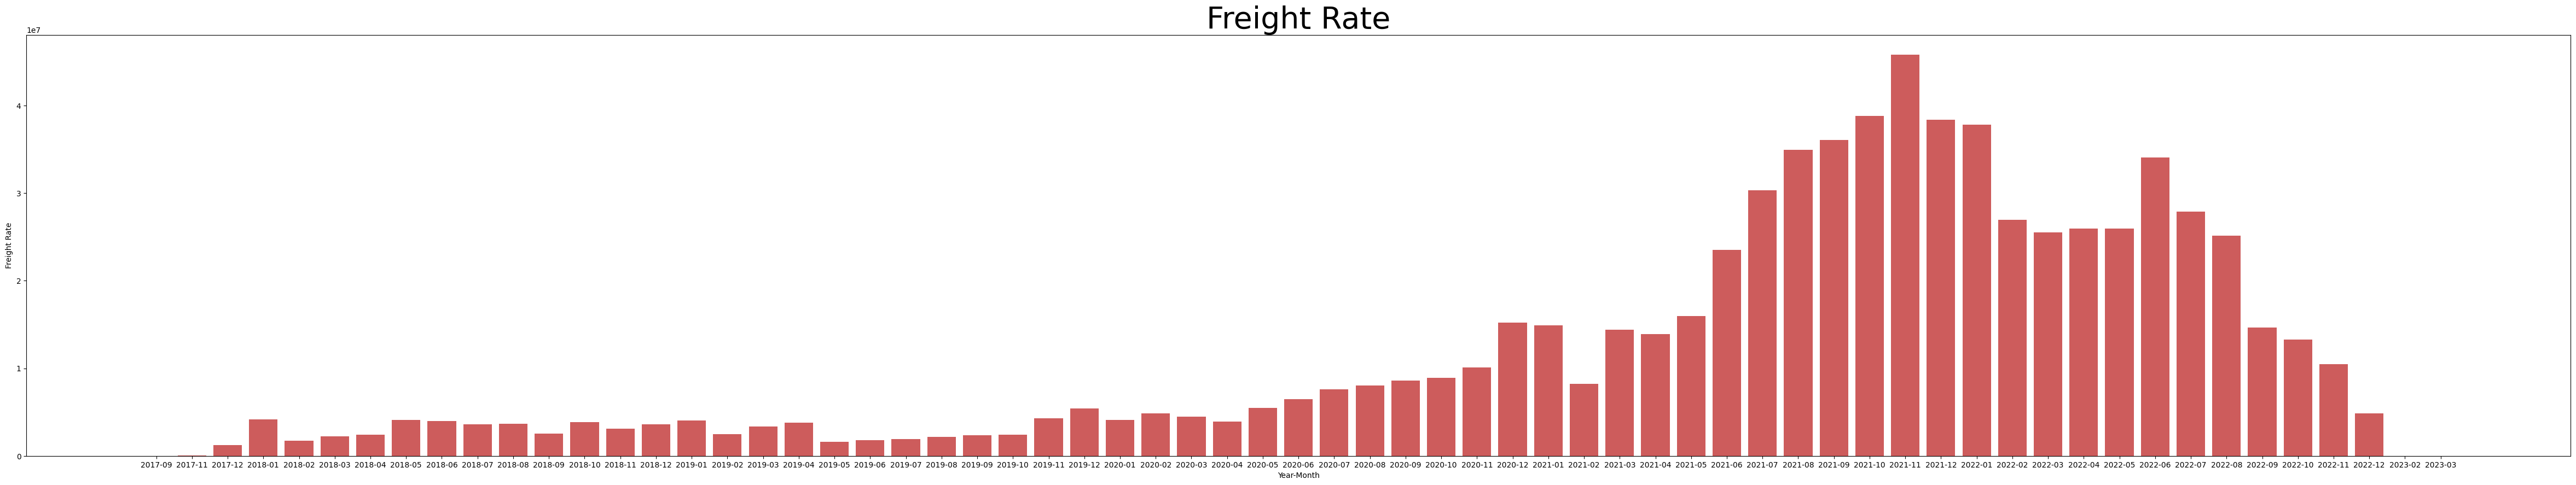

In [ ]:
plt.figure(figsize=(60,10))
plt.bar('Year-Month', 'TTL USD Amount', data=freight_rate_df, color = '#CD5C5C')
plt.xlabel('Year-Month')
plt.ylabel('Freight Rate')
plt.title('Freight Rate', fontsize=40)
plt.show()

In [34]:
mc = df.groupby(['Month', 'Year'])['MC'].sum()
mc_df = pd.DataFrame(mc)
mc_df = mc_df.reset_index(drop=False)
mc_df.head()

,Month,Year,MC
0,1,2018,3700831.09
1,1,2019,2869710.17
2,1,2020,2651932.76
3,1,2021,13309126.67
4,1,2022,31382768.26


MC - MC per TEUs

In [35]:
# merge month-year
mc_df['Y-M'] = pd.to_datetime(mc_df[['Year', 'Month']].assign(DAY=1)).dt.strftime('%Y-%m')
mc_df = mc_df.sort_values(by='Y-M')
mc_df.head()

,Month,Year,MC,Y-M
42,9,2017,3033.87,2017-09
53,11,2017,10997.30,2017-11
59,12,2017,793713.95,2017-12
0,1,2018,3700831.09,2018-01
5,2,2018,1421934.98,2018-02


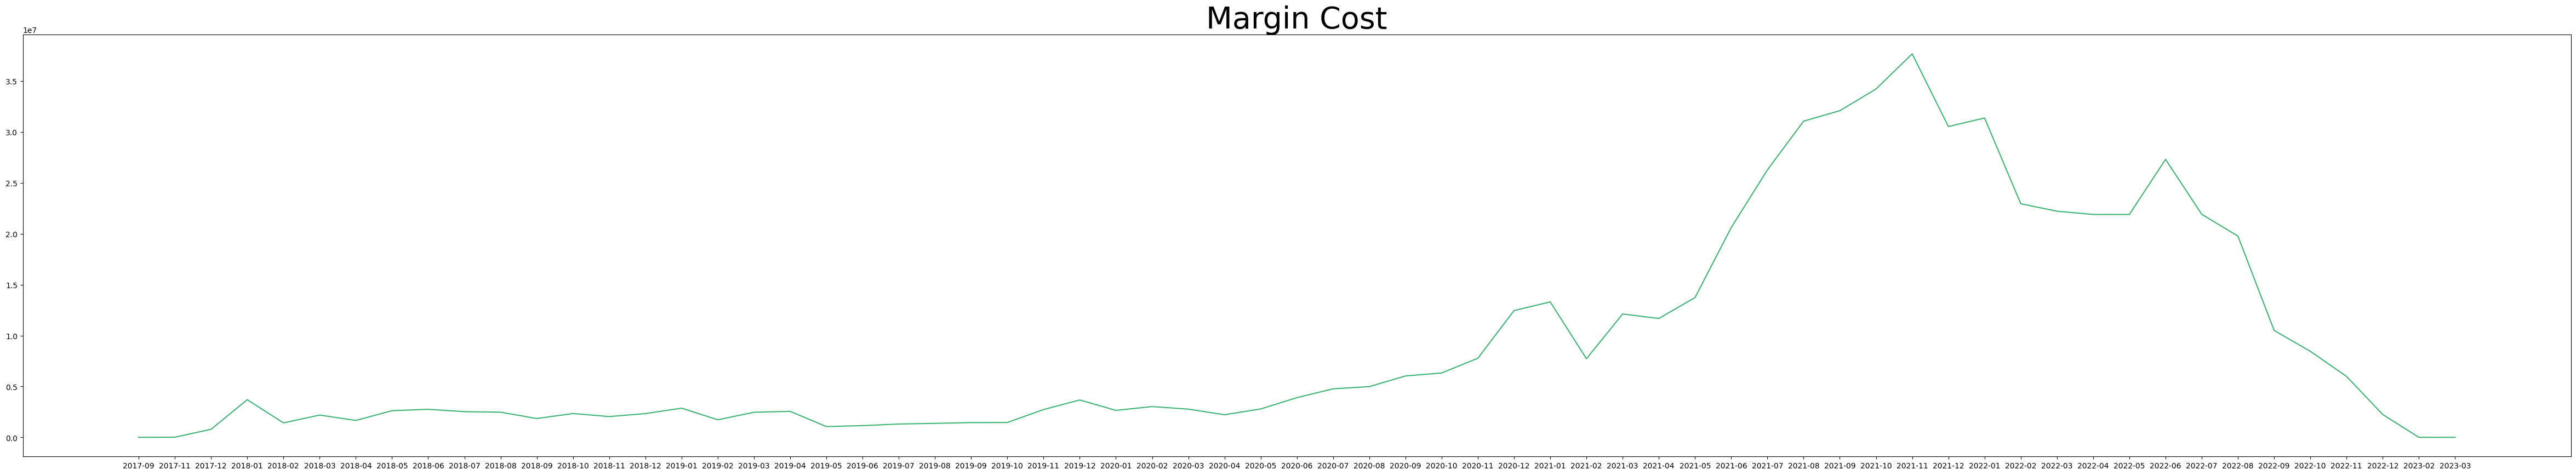

In [ ]:
colors = ['mediumseagreen']
plt.figure(figsize=(60,10))
plt.plot('Y-M', 'MC', data=mc_df, color = '#3CB371')
plt.title('Margin Cost', fontsize=40)
plt.show()

In [36]:
mc_per_teu = df.groupby(['Month', 'Year'])['MC per TEU'].sum()
mc_per_teu_df = pd.DataFrame(mc_per_teu)
mc_per_teu_df = mc_per_teu_df.reset_index(drop=False)
mc_per_teu_df.head()

,Month,Year,MC per TEU
0,1,2018,1117342.60
1,1,2019,944336.32
2,1,2020,818646.96
3,1,2021,4552568.55
4,1,2022,11134499.85


In [37]:
# merge month-year
mc_per_teu_df['Y-M'] = pd.to_datetime(mc_per_teu_df[['Year', 'Month']].assign(DAY=1)).dt.strftime('%Y-%m')
mc_per_teu_df = mc_per_teu_df.sort_values(by='Y-M')
mc_per_teu_df.head()

,Month,Year,MC per TEU,Y-M
42,9,2017,505.65,2017-09
53,11,2017,3006.95,2017-11
59,12,2017,188924.72,2017-12
0,1,2018,1117342.60,2018-01
5,2,2018,411020.76,2018-02


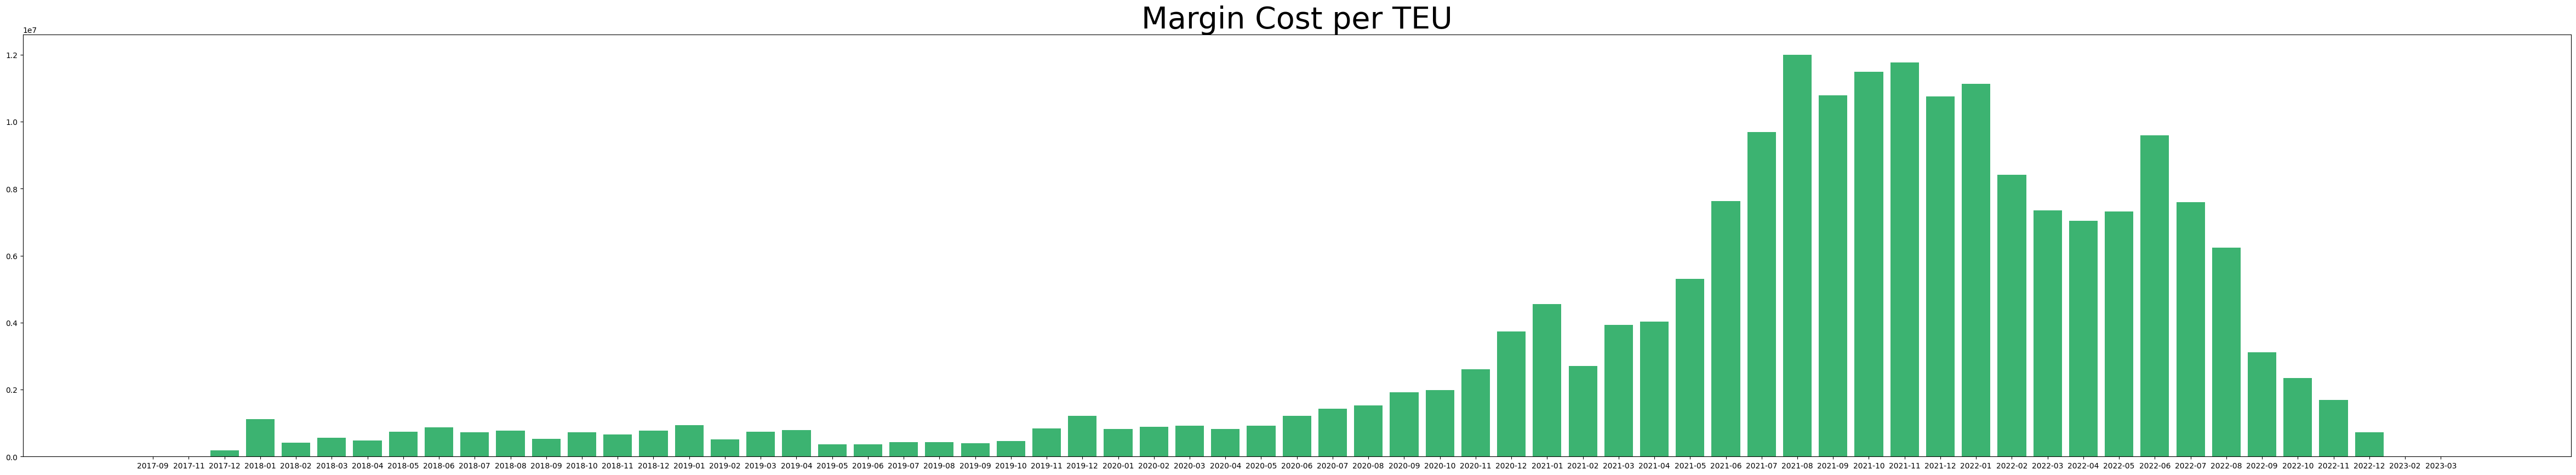

In [ ]:
plt.figure(figsize=(60,10))
plt.bar('Y-M', 'MC per TEU', data=mc_per_teu_df, color = '#3CB371')
plt.title('Margin Cost per TEU', fontsize=40)
plt.show()

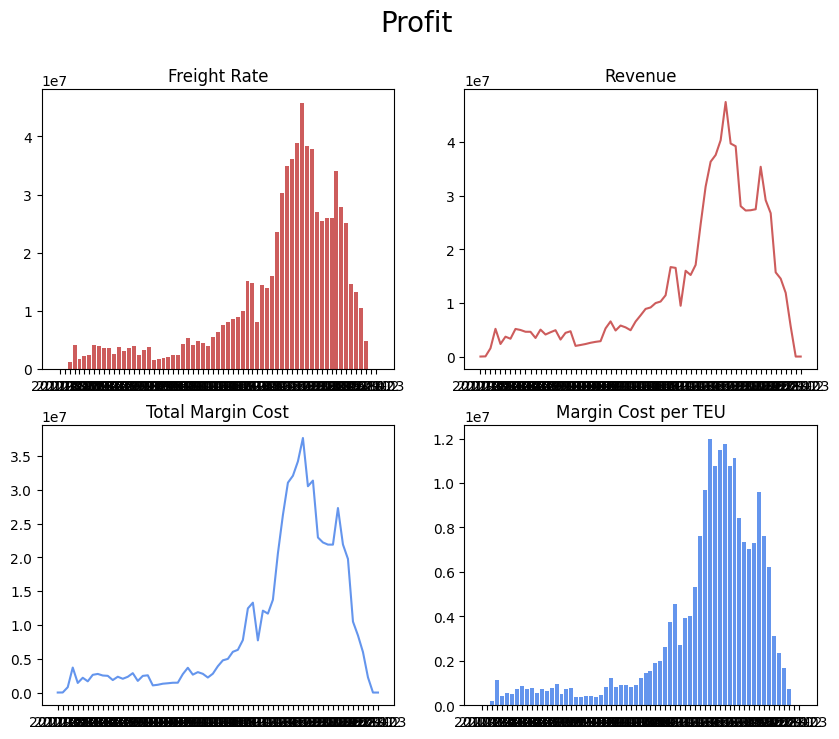

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# plot the first graph in the top left corner
axs[0, 0].bar('Year-Month', 'TTL USD Amount', data=freight_rate_df, color = '#CD5C5C')
axs[0, 0].set_title('Freight Rate')

# plot the second graph in the top right corner
axs[0, 1].plot('Year-Month', 'Revenue', data=rev_df, color = '#CD5C5C')
axs[0, 1].set_title('Revenue')

# plot the third graph in the bottom left corner
axs[1, 0].plot('Y-M', 'MC', data=mc_df, color = '#6495ED')
axs[1, 0].set_title('Total Margin Cost')

# plot the fourth graph in the bottom right corner
axs[1, 1].bar('Y-M', 'MC per TEU', data=mc_per_teu_df, color = '#6495ED')
axs[1, 1].set_title('Margin Cost per TEU')

# set the overall title for the subplot
fig.suptitle('Profit', fontsize=20)

# display the plot
plt.show()

### **Question 4: Which type of customer/payment term/Load mode/Disc mode is the most popular?**

In [ ]:
load_mode = df.groupby('Load Mode')['order'].count()
load_mode = load_mode.sort_values(ascending = False)
load_mode_df = pd.DataFrame(load_mode)
load_mode_df = load_mode_df.reset_index(drop=False)
load_mode_df

,Load Mode,order
0,Y-CY,128520
1,F-Free on Board (Free In),274
2,D-Door,2
3,S-CFS,1


In [ ]:
dis_mode = df.groupby('Disc. Mode')['order'].count()
dis_mode = dis_mode.sort_values(ascending = False)
dis_mode_df = pd.DataFrame(dis_mode)
dis_mode_df = dis_mode_df.reset_index(drop=False)
dis_mode_df

,Disc. Mode,order
0,Y-CY,121601
1,F-Free on Board (Free Out),3973
2,D-Door,3222
3,S-CFS,1


In [ ]:
payment = df.groupby('Payment Term')['order'].count()
payment = payment.sort_values(ascending = False)
payment_df = pd.DataFrame(payment)
payment_df = payment_df.reset_index(drop=False)
payment_df

,Payment Term,order
0,Prepaid,97082
1,Collect,31715


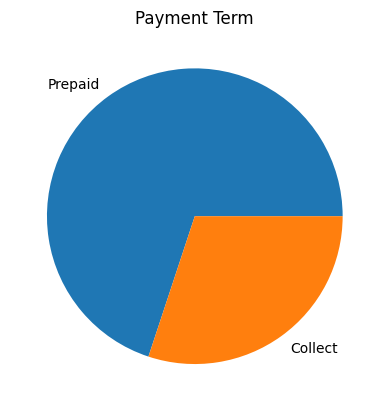

In [ ]:
# plt.pie(payment_df['order'], labels=payment_df['Payment Term'])
# plt.title('Payment Term')
# plt.show()

In [ ]:
cus = df.groupby('A/C Type')['order'].count()
cus = cus.sort_values(ascending = False)
cus_df = pd.DataFrame(cus)
cus_df = cus_df.reset_index(drop=False)
cus_df

,A/C Type,order
0,NVOCC,114790
1,BCO,13929
2,Tariff,54
3,Association,24


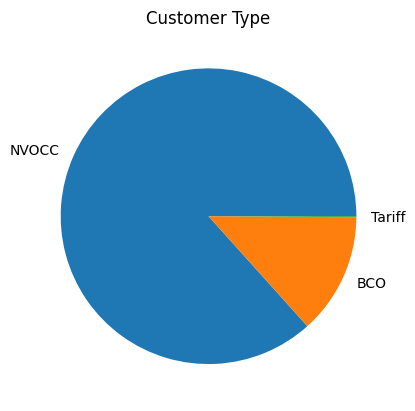

In [ ]:
# plt.pie(cus_df['order'], labels=cus_df['A/C Type'])
# plt.title('Customer Type')
# plt.show()

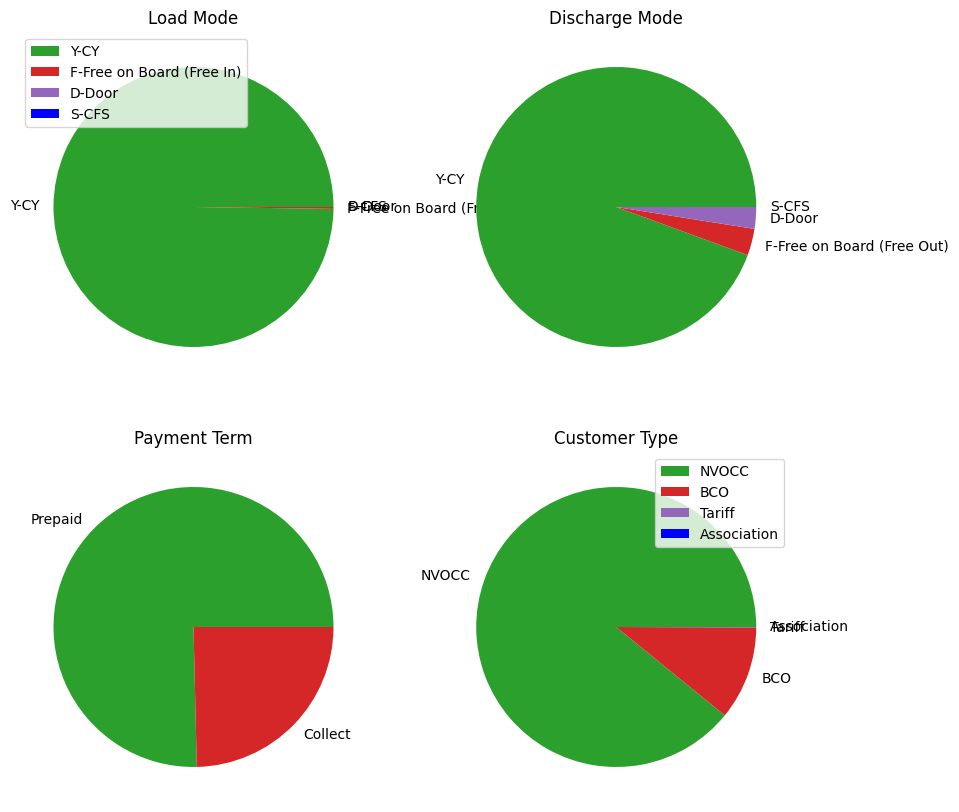

In [ ]:
colors=['#2ca02c', '#d62728', '#9467bd', 'blue']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10)) 
axes[0,0].pie(load_mode_df['order'], labels=load_mode_df['Load Mode'], colors = colors)
axes[0,0].set_title('Load Mode')
axes[0,0].legend(loc='upper left')

axes[0,1].pie(dis_mode_df['order'], labels=dis_mode_df['Disc. Mode'], colors=colors)
axes[0,1].set_title('Discharge Mode')

axes[1,0].pie(payment_df['order'], labels=payment_df['Payment Term'], colors = colors)
axes[1,0].set_title('Payment Term')

axes[1,1].pie(cus_df['order'], labels=cus_df['A/C Type'], colors = colors)
axes[1,1].set_title('Customer Type')
axes[1,1].legend(loc = 'upper right')

plt.show()

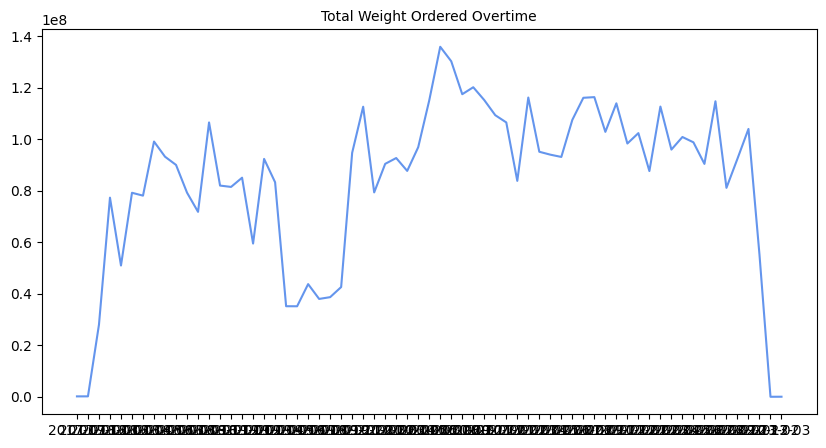

In [39]:
weight = df.groupby(['Month', 'Year'])['TTL Weight.1'].sum()
weight_df = pd.DataFrame(weight)
weight_df = weight_df.reset_index(drop=False)
weight_df['Y-M'] = pd.to_datetime(weight_df[['Year', 'Month']].assign(DAY=1)).dt.strftime('%Y-%m')
weight_df = weight_df.sort_values(by='Y-M')
plt.figure(figsize=(10,5))
plt.plot('Y-M', 'TTL Weight.1', data=weight_df, color = '#6495ED')
plt.title('Total Weight Ordered Overtime', fontsize=10)
plt.show()

### **Question 5: What are the MC Status over the year?**

In [ ]:
set(df['MC Status'])

{'APPROVED', 'PASSED', 'PENDING', 'REJECT'}

In [ ]:
mc_status = df.groupby('MC Status')['order'].count()
mc_status_df = pd.DataFrame(mc_status)
mc_status_df.head() 

,order
MC Status,
APPROVED,1313
PASSED,120403
PENDING,99
REJECT,6982


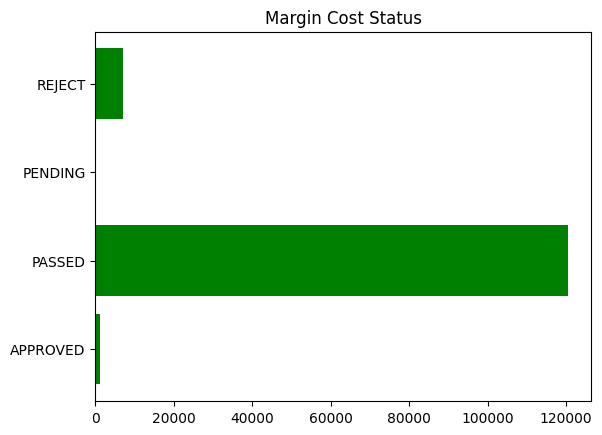

In [ ]:
plt.barh(mc_status.index, mc_status.values, color = 'green')
plt.title('Margin Cost Status')
plt.show()

### **Question 6: Length/duration between booking date - Load ETA - Load EDA?**

In [ ]:
df.head()

,order,Trade,Loop,Port of Loading,Port of Discharge,Load ETA,Load ETD,Booking Date,Load Mode,Disc. Mode,...,DF CC Amount,Revenue,MC,MC per TEU,A/C Type,Released Teus,TTL Weight.1,Year,Month,Year-Month
0,1019,IAPS,TSE,VNHPH,PHCEB,2018-01-20 08:00:00,2018-01-21 06:00:00,2017-09-27 09:57:04,Y-CY,Y-CY,...,65.0,4563.21,3033.87,505.65,NVOCC,6,158260.000,2017,9,2017-09
1,72,NCPW,TSE,VNHPH,DEHAM,2018-01-03 03:30:00,2018-01-04 00:30:00,2017-11-15 16:59:57,Y-CY,Y-CY,...,0.0,1863.89,900.31,450.16,NVOCC,1,22875.000,2017,11,2017-11
2,73,TPEB,TSE,VNHPH,CAVAN,2018-01-03 03:30:00,2018-01-04 00:30:00,2017-11-23 10:53:04,Y-CY,Y-CY,...,0.0,9758.96,2195.36,365.89,NVOCC,1,19497.000,2017,11,2017-11
3,69,TPEB,TSE,VNHPH,CAVAN,2018-01-03 03:30:00,2018-01-04 00:30:00,2017-11-15 16:08:23,Y-CY,Y-CY,...,0.0,1160.00,618.35,309.18,NVOCC,1,11924.000,2017,11,2017-11
4,74,TPEB,TSE,VNHPH,USLAX,2018-01-03 03:30:00,2018-01-04 00:30:00,2017-11-28 15:02:47,Y-CY,Y-CY,...,0.0,5005.84,2853.32,713.33,NVOCC,2,21768.244,2017,11,2017-11


In [ ]:
df[['Booking Date', 'Load ETD']].dtypes

Booking Date    datetime64[ns]
Load ETA                object
Load ETD        datetime64[ns]
dtype: object

In [ ]:
df['Total Waiting Duration (days)'] = (df['Load ETD'] - df['Booking Date']).dt.total_seconds()/86400
df.head()

,Trade,Loop,Port of Loading,Port of Discharge,Load ETD,Booking Date,Load Mode,Disc. Mode,DG,RF,...,MC,MC per TEU,A/C Type,Released Teus,TTL Weight.1,Year,Month,Year-Month,order,Total Waiting Duration (days)
0,IAPS,TSE,VNHPH,PHCEB,2018-01-21 06:00:00,2017-09-27 09:57:04,Y-CY,Y-CY,0,0,...,3033.87,505.65,NVOCC,6,158260.000,2017,9,2017-09,1,115.835370
1,TPEB,TSE,VNHPH,USLAX,2018-01-04 00:30:00,2017-11-28 15:02:47,Y-CY,Y-CY,0,0,...,2853.32,713.33,NVOCC,2,21768.244,2017,11,2017-11,2,36.393900
2,TPEB,TSE,VNHPH,CAVAN,2018-01-04 00:30:00,2017-11-15 16:08:23,Y-CY,Y-CY,0,0,...,618.35,309.18,NVOCC,1,11924.000,2017,11,2017-11,3,49.348345
3,TPEB,TSE,VNHPH,CAVAN,2018-01-04 00:30:00,2017-11-15 16:09:59,Y-CY,Y-CY,0,0,...,1424.91,284.98,NVOCC,3,27589.000,2017,11,2017-11,4,49.347234
4,TPEB,TSE,VNHPH,USTIW,2018-01-04 00:30:00,2017-11-16 15:52:19,Y-CY,Y-CY,0,0,...,1650.97,206.37,NVOCC,4,41047.000,2017,11,2017-11,5,48.359502


In [ ]:
df['Total Waiting Duration (days)'].describe()

count    128797.000000
mean         15.021159
std           8.618548
min        -184.338252
25%           8.854583
50%          13.511250
75%          19.473935
max         182.099711
Name: Total Waiting Duration (days), dtype: float64

In [ ]:
# df = df.drop(index=df[df['Total Waiting Duration (days)'].between(-184.338252,0)].index)
df = df.loc[df['Total Waiting Duration (days)'] >= 0]

In [ ]:
df['Total Waiting Duration (days)'].describe()

count    128718.000000
mean         15.047333
std           8.523840
min           0.104699
25%           8.860992
50%          13.518501
75%          19.479097
max         182.099711
Name: Total Waiting Duration (days), dtype: float64

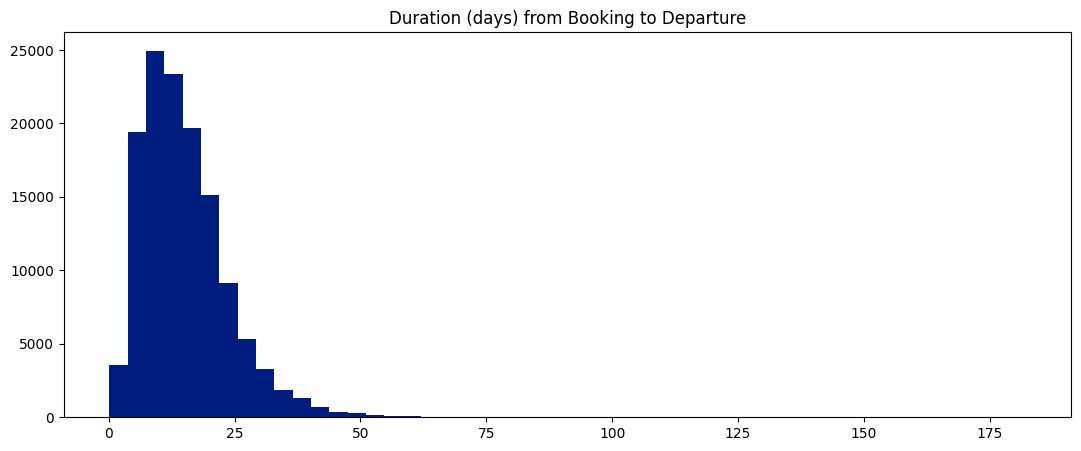

In [ ]:
plt.figure(figsize=(13,5))
plt.hist(x=df['Total Waiting Duration (days)'], bins = 50)
plt.title('Duration (days) from Booking to Departure')
plt.show()

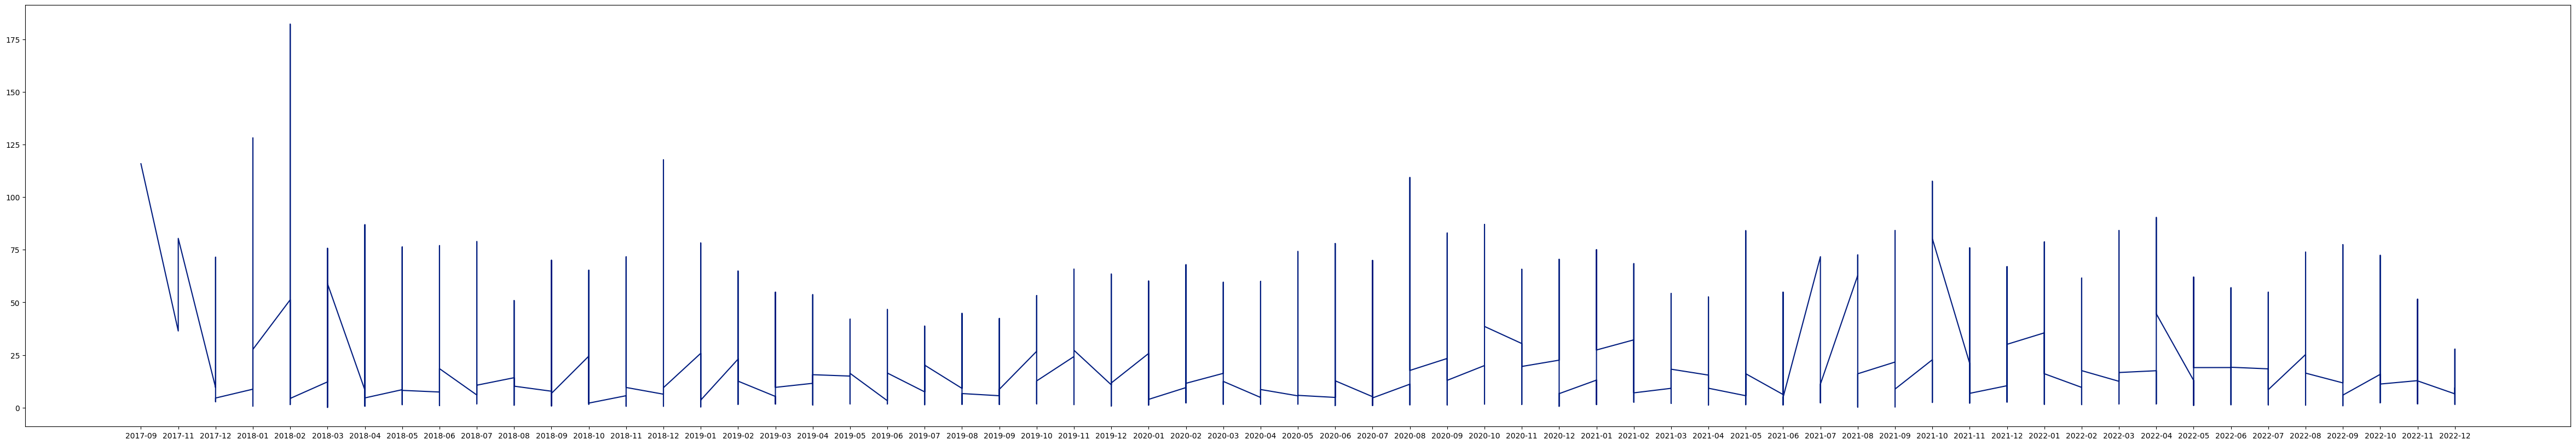

In [ ]:
duration = df[['Year-Month', 'Total Waiting Duration (days)']]
plt.figure(figsize=(60,10))
plt.plot('Year-Month', 'Total Waiting Duration (days)', data=duration)
plt.show()

### **Question 7: Which types of containers are mostly ordered?**
Tableau?

In [40]:
container = df[['20DC', '40DC', '40HQ', '45HQ', '20RF', '40RQ', '20FO',
       '40FO', '20FC', '40FC', 'Year-Month']]
con_type = container.groupby('Year-Month')[['20DC', '40DC', '40HQ', '45HQ', '20RF', '40RQ', '20FO',
       '40FO', '20FC', '40FC']].sum()
con_type[:15]

,20DC,40DC,40HQ,45HQ,20RF,40RQ,20FO,40FO,20FC,40FC
Year-Month,,,,,,,,,,
2017-09,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-11,1.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12,706.0,75.0,563.0,0.0,0.0,46.0,0.0,0.0,0.0,0.0
2018-01,1707.0,156.0,1603.0,0.0,2.0,53.0,0.0,7.0,0.0,7.0
2018-02,1222.0,111.0,961.0,0.0,1.0,10.0,0.0,1.0,0.0,0.0
2018-03,1660.0,157.0,1739.0,0.0,1.0,21.0,0.0,1.0,0.0,5.0
2018-04,1665.0,166.0,1664.0,0.0,2.0,19.0,0.0,0.0,0.0,1.0
2018-05,1852.0,158.0,2604.0,0.0,2.0,19.0,2.0,13.0,1.0,0.0
2018-06,1720.0,232.0,2489.0,0.0,2.0,22.0,1.0,1.0,1.0,2.0


In [41]:
con_type_perc = con_type.div(con_type.sum(axis=1), axis=0)
con_type_perc[:10]

,20DC,40DC,40HQ,45HQ,20RF,40RQ,20FO,40FO,20FC,40FC
Year-Month,,,,,,,,,,
2017-09,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-11,0.066667,0.000000,0.933333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-12,0.507914,0.053957,0.405036,0.0,0.000000,0.033094,0.000000,0.000000,0.000000,0.000000
2018-01,0.482885,0.044130,0.453465,0.0,0.000566,0.014993,0.000000,0.001980,0.000000,0.001980
2018-02,0.529922,0.048135,0.416739,0.0,0.000434,0.004337,0.000000,0.000434,0.000000,0.000000
2018-03,0.463170,0.043806,0.485212,0.0,0.000279,0.005859,0.000000,0.000279,0.000000,0.001395
2018-04,0.473415,0.047199,0.473131,0.0,0.000569,0.005402,0.000000,0.000000,0.000000,0.000284
2018-05,0.398194,0.033971,0.559880,0.0,0.000430,0.004085,0.000430,0.002795,0.000215,0.000000
2018-06,0.384787,0.051902,0.556823,0.0,0.000447,0.004922,0.000224,0.000224,0.000224,0.000447


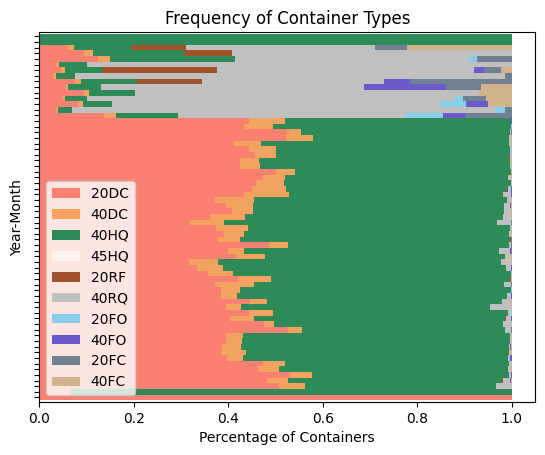

In [51]:
colors = ['#FA8072','#F4A460','#2E8B57','#FFF5EE','#A0522D','#C0C0C0','#87CEEB','#6A5ACD','#708090','#D2B48C']
fig, ax = plt.subplots()
con_type_perc.plot(kind='barh', stacked=True, width=1, ax=ax, color = colors)
ax.set_ylabel('Year-Month')
ax.set_yticklabels([])
ax.set_xlabel('Percentage of Containers')
ax.set_title('Frequency of Container Types')
plt.show()